## SOMPO SİGORTA CASE STUDY ÇALIŞMASI - Actuarial Data Scientist / Pricing Analyst pozisyonu
### RABİA İNCİ ERYILMAZ

In [36]:
# GEREKLİ KÜTÜPHANELER
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency # ki-kare testi için

In [37]:
data=pd.read_csv("Case_Study_Data.xlsx - DATA.csv")
df=data.copy()
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0%,7,MERCEDES,4,2020,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,15236,30%,8,MERCEDES,1,2023,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,15237,30%,6,FORD,2,2022,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,15239,30%,7,VOLKSWAGEN,1,2023,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T


#### Veri seti bilgisi:
| Sütun Adı                     | Açıklama                                                                                                                                           |
|--------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| TEKLİF NUMARASI                | Teklifin sistemdeki unique numarası                                                                                                               |
| HASARSIZLIK İNDİRİMİ KADEMESİ  | Müşterinin kasko hasarsızlık indirimi kademesini temsil eder. (0 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)              |
| TRAFİK BASAMAK KODU            | Müşterinin trafik hasarsızlık basamağını temsil eder. (4 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)                      |
| MARKA                          | Aracın markası                                                                                                                                   |
| ARAÇ YAŞI                      | Aracın yaşı                                                                                                                                      |
| MODEL YILI                     | Aracın model yılı                                                                                                                                |
| YAKIT TİPİ                     | Aracın yakıt tipi                                                                                                                                |
| İL                             | Sigortalının ili                                                                                                                                 |
| İLÇE                           | Sigortalının ilçesi                                                                                                                              |
| YAŞ                            | Sigortalının yaşı                                                                                                                                |
| TEKLİF PRİMİ                   | Sigortalının teklif primi                                                                                                                        |
| PORTFÖY AYRIMI                 | Poliçenin şirkette tekabül ettiği portföy alanı                                                                                                  |
| SİGORTALI TİPİ                 | Sigortalının özel - tüzel müşteri olma durumu ayrımı (**O= bireysel sigortalı, T= kurumsal sigortalı**)                                                                                            |
| TEKLİF ONAY DURUMU             | Sigortalıya sunulan teklifin onaylanma veya onaylanmama durumu (**T → Onaylanmadı, P → Onaylandı**)                                              |

In [38]:
df.shape

(19085, 14)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19085 entries, 0 to 19084
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TEKLİF NUMARASI                19085 non-null  int64  
 1   HASARSIZLIK İNDİRİMİ KADEMESİ  19085 non-null  object 
 2   TRAFİK BASAMAK KODU            19085 non-null  int64  
 3   MARKA                          19085 non-null  object 
 4   ARAÇ YAŞI                      19085 non-null  int64  
 5   MODEL YILI                     19085 non-null  int64  
 6   YAKIT TİPİ                     19085 non-null  object 
 7   İL                             19085 non-null  object 
 8   İLÇE                           13830 non-null  object 
 9   YAŞ                            19085 non-null  int64  
 10  TEKLİF PRİMİ                   19085 non-null  float64
 11  PORTFÖY AYRIMI                 19085 non-null  object 
 12  SİGORTALI TİPİ                 19085 non-null 

In [40]:
df.isnull().sum()

TEKLİF NUMARASI                     0
HASARSIZLIK İNDİRİMİ KADEMESİ       0
TRAFİK BASAMAK KODU                 0
MARKA                               0
ARAÇ YAŞI                           0
MODEL YILI                          0
YAKIT TİPİ                          0
İL                                  0
İLÇE                             5255
YAŞ                                 0
TEKLİF PRİMİ                        0
PORTFÖY AYRIMI                      0
SİGORTALI TİPİ                      0
TEKLİF ONAY DURUMU                  0
dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TEKLİF NUMARASI,19085.0,24910.144040,5584.407597,15235.000,20079.000,24907.000,29749.000,34570.000
TRAFİK BASAMAK KODU,19085.0,5.849044,1.410988,1.000,5.000,6.000,7.000,8.000
ARAÇ YAŞI,19085.0,2.572334,1.379313,0.000,1.000,2.000,4.000,5.000
MODEL YILI,19085.0,2021.427666,1.379313,2019.000,2020.000,2022.000,2023.000,2024.000
YAŞ,19085.0,30.695048,20.837731,0.000,0.000,36.000,47.000,64.000
TEKLİF PRİMİ,19085.0,14.393647,15.957490,2.748,8.654,11.048,15.243,646.562


- İlçe değişkeninde eksik değerler var bakalım
- Yaş değişkeni 0-64 arasında 18 altında olmaması gerekiyor bakalım
- Trafik basamak kodu 4 den başlar deniliyordu 1-8 arasında bakalım
- Hasarsızlık indirim kademesi string float a çevirelim
- Model yılı ve araç yaşı tutarlıysa birini çıkaralım
- Teklif primi min-max değerleri arasında çok fark var aykırı değerler olabilir
- Teklif numarası kontrol edelim, tüm satırlar eşsiz gözlemi mi ifade ediyor

In [42]:
# "İLÇE" sütununda boş (NaN) olan satırlara bakalım
missing_ilce = df[df["İLÇE"].isnull()]
missing_ilce

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
11,15246,40%,6,MERCEDES,2,2022,DIZEL,ANKARA,NaN,0,22.488,YENİ İŞ,T,T
15,15250,30%,6,VOLKSWAGEN,2,2022,BENZİN,ANKARA,NaN,0,18.105,YENİ İŞ,T,P
16,15251,30%,4,FORD,2,2022,DIZEL,ANKARA,NaN,0,10.419,YENİ İŞ,T,T
18,15253,50%,7,FORD,3,2021,DIZEL,ANKARA,NaN,0,13.921,YENİ İŞ,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19071,34557,30%,5,RENAULT,1,2023,DIZEL,İSTANBUL,NaN,0,10.335,YENİ İŞ,T,T
19075,34561,0%,1,MERCEDES,5,2019,DIZEL,İSTANBUL,NaN,0,65.370,İLK DEFA SİGORTALI,T,T
19076,34562,0%,7,MERCEDES,3,2021,DIZEL,ANKARA,NaN,0,24.612,İLK DEFA SİGORTALI,T,T
19078,34564,0%,7,VOLKSWAGEN,4,2020,BENZİN,İSTANBUL,NaN,0,23.763,YENİ İŞ,T,T


İlçe değişkeni boş olanların yaşı sıfır ve sigortalı tipi T yani kurumsal hepsi için öyle mi? kontrol edelim

In [43]:
# Sadece kurumsallar
df_kurumsal = df[df["SİGORTALI TİPİ"] == "T"].copy()

# 1) İlçe bilgisinde boş olanların sayısı
print("İlçe bilgisi boş olanlar:", df_kurumsal["İLÇE"].isna().sum())

# 2) Yaş bilgisi 0 olanların sayısı
print("Yaş=0 olanlar:", (df_kurumsal["YAŞ "] == 0).sum())

# 3) Toplam satır sayısı
print("Toplam kurumsal:", len(df_kurumsal))

İlçe bilgisi boş olanlar: 5255
Yaş=0 olanlar: 5255
Toplam kurumsal: 5255


In [44]:
# Hem ilçe boş hem yaş=0 olanlar
mask = df_kurumsal["İLÇE"].isna() & (df_kurumsal["YAŞ "] == 0)
print("İlçe boş ve yaş=0 olanlar:", mask.sum())

# Karşılaştırma
if mask.sum() == len(df_kurumsal):
    print("Evet ✅ Tüm kurumsal kayıtlarında ilçe boş ve yaş=0 aynı satırlarda.")
else:
    print("Hayır ❌ Bazı farklılıklar var.")

İlçe boş ve yaş=0 olanlar: 5255
Evet ✅ Tüm kurumsal kayıtlarında ilçe boş ve yaş=0 aynı satırlarda.


Yorumum: Kurumsal sigortalılar için Yaş ve İlçe değişkenlerinin bir belirleyici değişken olmadığı o yüzden modelleme sırasında kurumsal sigortalılar ve bireysel sigortalılar için ayrı tahminleme yapılabilir

In [45]:
# "TEKLİF NUMARASI" için tekrar eden değer kontrolü yapalım(duplicates)
tekrar_sayisi=df["TEKLİF NUMARASI"].duplicated()
tekrar_sayisi.sum()

0

In [46]:
# Model yılı- Araç yaşı sütunları kontrolü 2025 yılı referans alınarak
fark = 2025 - df["MODEL YILI"]
kontrol_2025 = fark == df["ARAÇ YAŞI"]   # True/False seri
print(kontrol_2025.all())  # hepsi eşit mi?

# 2024 yılı baz alınarak
fark = 2024 - df["MODEL YILI"]
kontrol_2024 = fark == df["ARAÇ YAŞI"]   # True/False seri
print(kontrol_2024.all())  # hepsi eşit mi?

False
True


Sonuç: 2024 yılına dayalı bir veri seti ve model yılı ile araç yaşı sütunları tam eşleşme gösterdiğinden veri setinde sadece bir sütun kullanılabilir. Modelde gereksiz karmaşıklık çıkarmaması adına

In [47]:
df = df.drop(columns=["MODEL YILI"])

# Kalan sütunları kontrol edelim
df.columns.tolist()

['TEKLİF NUMARASI',
 'HASARSIZLIK İNDİRİMİ KADEMESİ',
 'TRAFİK BASAMAK KODU',
 'MARKA',
 'ARAÇ YAŞI',
 'YAKIT TİPİ',
 'İL',
 'İLÇE',
 'YAŞ ',
 'TEKLİF PRİMİ',
 'PORTFÖY AYRIMI',
 'SİGORTALI TİPİ',
 'TEKLİF ONAY DURUMU']

In [48]:
# İndirim yüzdesi müşterinin risk profili ve hasar kaydıyla ilişkisi olabilir ondan sayısal formata çeviriyorum
df["HASARSIZLIK İNDİRİMİ KADEMESİ"] = df["HASARSIZLIK İNDİRİMİ KADEMESİ"].str.replace("%","").astype(float)
df["HASARSIZLIK İNDİRİMİ KADEMESİ"] = df["HASARSIZLIK İNDİRİMİ KADEMESİ"] / 100
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,15236,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,15237,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,15238,0.3,5,RENAULT,1,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,15239,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T


#### Portföy ayrımına göre trafik basamak kodu ve hasarsızlık indirimi kademesi ayarlaması için
- İlk defa sigortalı = Trafik basamak kodu 4, hasarsızlık indirimi %0.
- Yeni iş = Başka şirketten devrolan basamak kodu + indirim taşır.
- Yenileme = Mevcut şirket içindeki basamak kodu + indirim güncellenir.
- Sıfır araç = Eğer sürücü önceden başka aracında sigortalıysa eski basamak korunur.

In [49]:
# İlk defa sigortalı olanların trafik basamak kodunu 4 yap
df.loc[df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI", "TRAFİK BASAMAK KODU"] = 4

# İlk defa sigortalı olanların hasarsızlık indirim kademesini 0 yap
df.loc[df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI", "HASARSIZLIK İNDİRİMİ KADEMESİ"] = 0
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,15236,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,15237,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,15238,0.3,5,RENAULT,1,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,15239,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T


In [50]:
# İlk defa sigortalı olan ve trafik basamak kodu 4 olmayanlar
hatalilar_trafik = df[
    (df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI") & 
    (df["TRAFİK BASAMAK KODU"] != 4)
]

# İlk defa sigortalı olan ve hasarsızlık indirimi kademesi 0 olmayanlar
hatalilar_hasarsizlik = df[
    (df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI") & 
    (df["HASARSIZLIK İNDİRİMİ KADEMESİ"] != 0)
]

(len(hatalilar_trafik), len(hatalilar_hasarsizlik))

(0, 0)

In [51]:
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,15236,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,15237,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,15238,0.3,5,RENAULT,1,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,15239,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T


In [52]:
# Hedef değişkenimizi "TEKLİF ONAY DURUMU" P=1 (onaylandı), T=0 (onaylanmadı), formatında güncelleyim böylelikle int formatı elde etmiş oluruz
# 0- 1 çevirme sebebimiz model uyumluluğunu artırmak
df["TEKLİF ONAY DURUMU"]=(df["TEKLİF ONAY DURUMU"].astype(str).str.upper()=="P").astype(int)

In [53]:
# şimdi Teklif onay durumu sütunun kendi içindeki oranına bakalım
class_counts = df["TEKLİF ONAY DURUMU"].value_counts(dropna=False) \
                 .rename_axis("ONAY_DURUMU").reset_index(name="Adet")
class_counts["Oran (%)"] = (class_counts["Adet"] / len(df) * 100).round(2)

class_counts

,ONAY_DURUMU,Adet,Oran (%)
0,0,16711,87.56
1,1,2374,12.44


In [54]:
# Kolon isimlerini temizleyelim (bir kez yapmak yeterli)
df.columns = df.columns.str.strip()

## VERİ GÖRSELLEŞTİRME

Bakılması gereken durumlar
- teklif onay durumu dağılımı
- teklif primi grafiği aykırı değer var mı
- teklif primi ile onay durumu
- korelasyon analizi
- bireysel sigortalılar için il, ilçe, model türü, yakıt tipi, portföy ayrımı, teklif primini ve onay durumunu nasıl etkiliyor
- kurumsal sigortalılarda il, model türü, yakıt tipi, portföy ayrımı, teklif primini ve onay durumunu nasıl etkiliyor

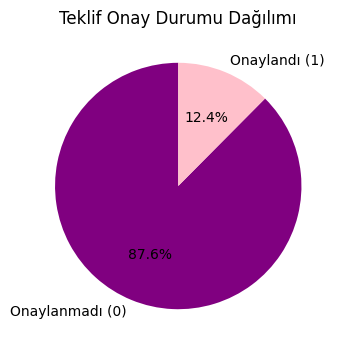

In [55]:
# Değer sayıları
counts = df["TEKLİF ONAY DURUMU"].value_counts()

# Etiketler
labels = ["Onaylanmadı (0)", "Onaylandı (1)"]

# Pie chart
plt.figure(figsize=(4,4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["purple","pink"])
plt.title("Teklif Onay Durumu Dağılımı")
plt.show()

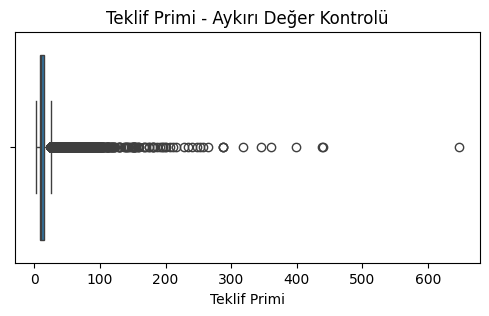

In [56]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["TEKLİF PRİMİ"])
plt.title("Teklif Primi - Aykırı Değer Kontrolü")
plt.xlabel("Teklif Primi")
plt.show()

In [57]:
# Teklif Primi sütunu için değer aralıklarına bakalım
# 100’lük aralıklarla gruplama
max_val = int(df["TEKLİF PRİMİ"].max())   # float → int dönüşümü
bins = list(range(0, max_val + 100, 100))
labels = [f"{i}-{i+100}" for i in bins[:-1]]

# Yeni sütun eklemeden sadece geçici seride aralıkları oluştur
prim_aralik = pd.cut(df["TEKLİF PRİMİ"], bins=bins, labels=labels, right=False)

pivot = prim_aralik.value_counts().sort_index()

# DataFrame formatında görmek için
pivot_df = pivot.reset_index()
pivot_df.columns = ["Prim Aralık", "Frekans"]

print(pivot_df)

  Prim Aralık  Frekans
0       0-100    18980
1     100-200       84
2     200-300       14
3     300-400        4
4     400-500        2
5     500-600        0
6     600-700        1


Teklif Primi Sütunu için yorumlarım
- tekliflerin çoğunluğu 0-100 arasında
- uç değerler var bu da modelin öğrenmesini zorlaştırabilir silmek veya sınır eklemek veri kaybına sebep verebilir ondan log dönüşüm yaparak normalize ederiz ve uç değerlerin etkisi azalır
- modelleme öncesi log dönüşüm yapılmalı

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\603126332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TEKLİF ONAY DURUMU", y="TEKLİF PRİMİ", data=df, palette="Set2")


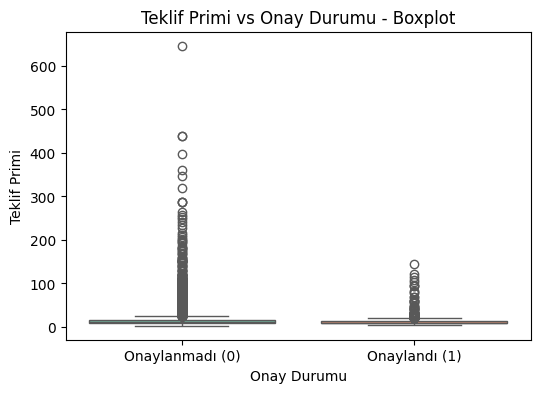

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(x="TEKLİF ONAY DURUMU", y="TEKLİF PRİMİ", data=df, palette="Set2")
plt.xticks([0,1], ["Onaylanmadı (0)", "Onaylandı (1)"])
plt.title("Teklif Primi vs Onay Durumu - Boxplot")
plt.xlabel("Onay Durumu")
plt.ylabel("Teklif Primi")
plt.show()

Onaylanan tekliflerin neredeyse tamamı düşük primlerde gerçekleşmektedir. Prim arttıkça reddedilme ihtimali hızla yükselmekte, bu da fiyat duyarlılığının çok yüksek olduğunu göstermektedir.

In [59]:
# Teklif primi sütununu diğer değişkenlerle beraber incelerken dağılım daha normal olması için log dönüşüm yapalım
# Log dönüşümü (aykırı değer etkisini azaltmak için)
df["TEKLIF_PRIMI_LOG"] = np.log1p(df["TEKLİF PRİMİ"])

In [60]:
# Bireysel sigortalılar (O)
df_bireysel = df[df["SİGORTALI TİPİ"] == "O"].copy()

print("Toplam bireysel müşteri sayısı:", len(df_bireysel))

Toplam bireysel müşteri sayısı: 13830


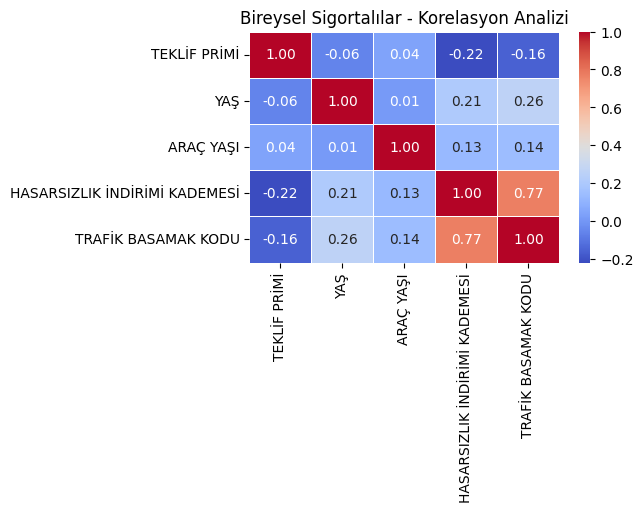

In [61]:
# Sayısal kolonları seçelim
num_cols = ["TEKLİF PRİMİ", "YAŞ", "ARAÇ YAŞI", 
            "HASARSIZLIK İNDİRİMİ KADEMESİ", "TRAFİK BASAMAK KODU"]

# Korelasyon matrisi
corr = df_bireysel[num_cols].corr()

# Heatmap çizimi
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Bireysel Sigortalılar - Korelasyon Analizi")
plt.show()

- Bireysel müşterilerde teklif primi en çok sürücü geçmişiyle (trafik basamak kodu ve hasarsızlık indirimi) ilişkilidir. Araç yaşı ve müşteri yaşı ise düşük korelasyon göstermektedir.
- Yaş ve araç yaşı, korelasyon açısından zayıf ama dolaylı etkileri olabilir

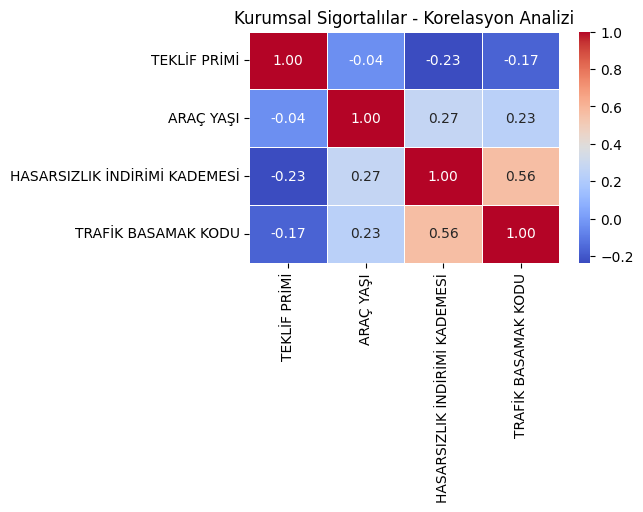

In [62]:
# Kurumsal müşteriler
df_kurumsal = df[df["SİGORTALI TİPİ"] == "T"].copy()

# Gereksiz sütunları düşürelim
df_kurumsal = df_kurumsal.drop(columns=["YAŞ", "İLÇE"])

# Sayısal kolonlar (aynı seçimi kullanalım)
num_cols = ["TEKLİF PRİMİ", "ARAÇ YAŞI", 
            "HASARSIZLIK İNDİRİMİ KADEMESİ", "TRAFİK BASAMAK KODU"]

# Korelasyon matrisi
corr_kurumsal = df_kurumsal[num_cols].corr()

# Heatmap çizimi
plt.figure(figsize=(5,3))
sns.heatmap(corr_kurumsal, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Kurumsal Sigortalılar - Korelasyon Analizi")
plt.show()

Kurumsal müşterilerde prim hesaplaması bireysellere kıyasla daha dağınık. Prim üzerinde en etkili değişkenler yine hasarsızlık indirimi ve trafik basamağıdır; ancak bu etki bireysellere göre daha zayıftır. Araç yaşı kurumsal segmentte daha anlamlıdır.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay_bireysel, palette="viridis", ax=axes[0,0])
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `e

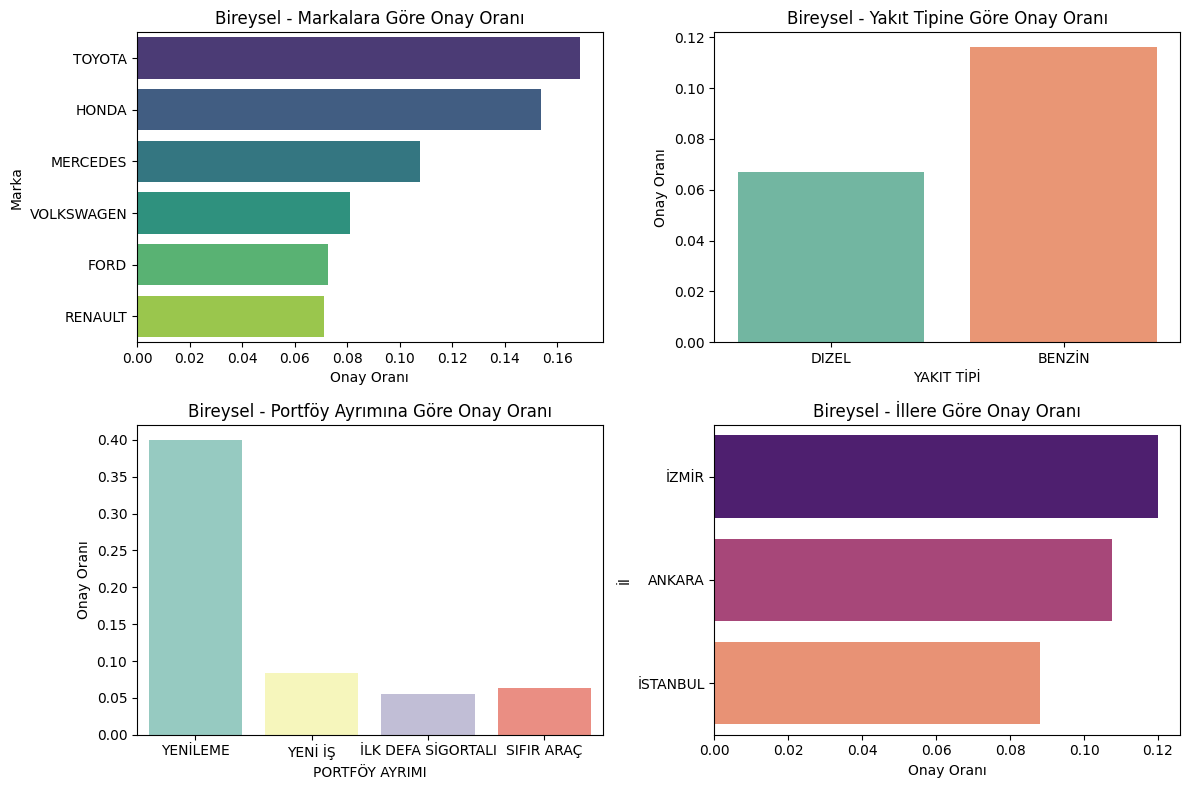

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1) Marka bazlı onay oranı
brand_onay_bireysel = (
    df_bireysel.groupby("MARKA")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay_bireysel, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Bireysel - Markalara Göre Onay Oranı")
axes[0,0].set_xlabel("Onay Oranı")
axes[0,0].set_ylabel("Marka")

# 2) Yakıt tipine göre onay oranı
sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU", 
            data=df_bireysel, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Bireysel - Yakıt Tipine Göre Onay Oranı")
axes[0,1].set_ylabel("Onay Oranı")

# 3) Portföy ayrımına göre onay oranı
sns.barplot(x="PORTFÖY AYRIMI", y="TEKLİF ONAY DURUMU", 
            data=df_bireysel, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set3", ax=axes[1,0])
axes[1,0].set_title("Bireysel - Portföy Ayrımına Göre Onay Oranı")
axes[1,0].set_ylabel("Onay Oranı")

# 4) İl bazlı onay oranı
il_onay_bireysel = (
    df_bireysel.groupby("İL")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="İL", data=il_onay_bireysel, palette="magma", ax=axes[1,1])
axes[1,1].set_title("Bireysel - İllere Göre Onay Oranı")
axes[1,1].set_xlabel("Onay Oranı")
axes[1,1].set_ylabel("İl")

plt.tight_layout()
plt.show()

1) Markalara Göre Onay Oranı:
- Toyota ve Honda gibi markaların onay oranı diğer markalara göre daha yüksek.
- Renault, Ford, Volkswagen gibi markalarda onay oranı daha düşük.
- Bu, müşteri kitlesinin markaya göre risk/fiyat hassasiyetinin değiştiğini gösteriyor.

2) Yakıt Tipine Göre Onay Oranı:
- Benzinli araç sahiplerinin teklif onay oranı dizel araç sahiplerinden belirgin şekilde daha yüksek.
- Bu, dizel araçların daha yüksek primlerle teklif edildiğini veya dizel kullanıcılarının fiyat duyarlılığının daha yüksek olduğunu düşündürüyor.

3) Portföy Ayrımına Göre Onay Oranı:
- En yüksek onay oranı %40 civarında “Yenileme” grubunda.
- “Yeni İş”, “İlk Defa Sigortalı” ve “Sıfır Araç” gruplarında onay oranları %5–10 aralığında çok düşük.
- Yani mevcut müşteriyi elde tutmak çok daha kolay, yeni müşteri kazanımı ise zor.

4) İllere Göre Onay Oranı:
- İzmir’de onay oranı %12 civarında en yüksek.
- Ankara %10, İstanbul ise %8 civarında → İstanbul’da fiyat hassasiyeti daha yüksek olabilir.
- Bu da bölgesel farklılıkların stratejiye dahil edilmesi gerektiğini gösteriyor.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay, palette="viridis", ax=axes[0,0])
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorb

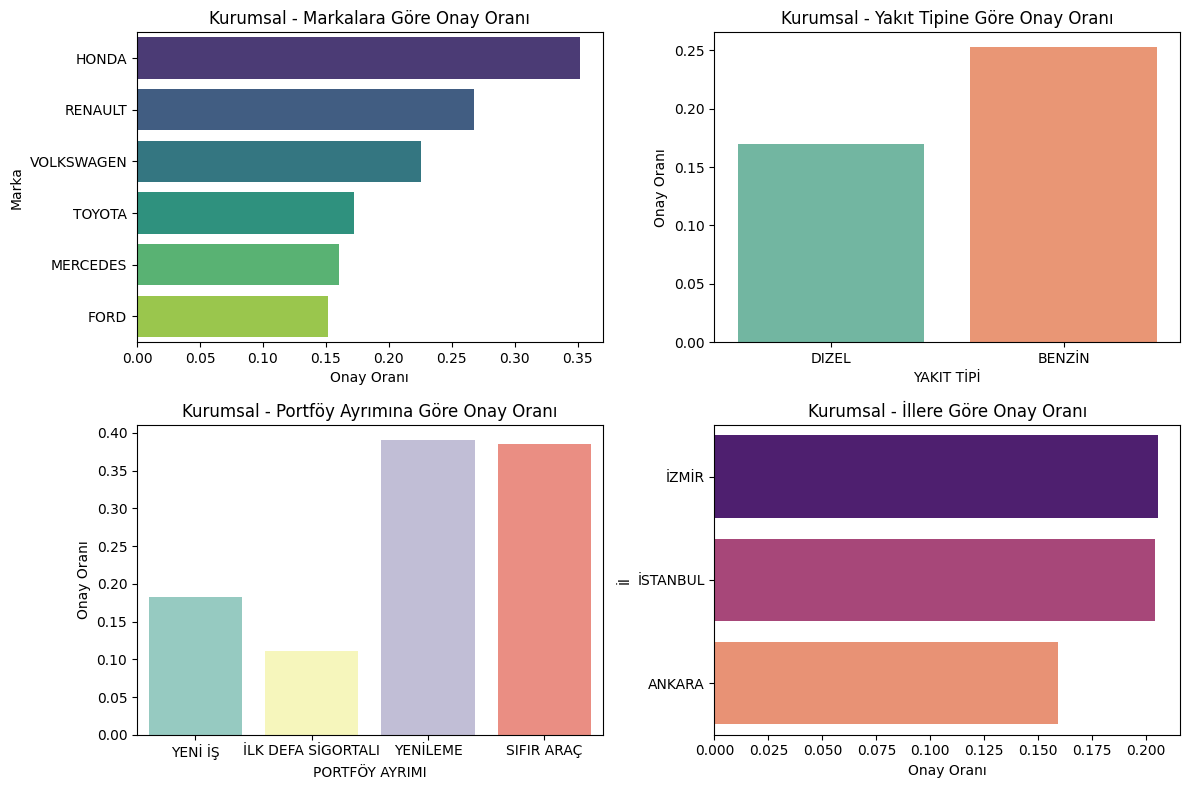

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1) Marka bazlı onay oranı
brand_onay = (
    df_kurumsal.groupby("MARKA")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Kurumsal - Markalara Göre Onay Oranı")
axes[0,0].set_xlabel("Onay Oranı")
axes[0,0].set_ylabel("Marka")

# 2) Yakıt tipine göre onay oranı
sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU", 
            data=df_kurumsal, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Kurumsal - Yakıt Tipine Göre Onay Oranı")
axes[0,1].set_ylabel("Onay Oranı")

# 3) Portföy ayrımına göre onay oranı
sns.barplot(x="PORTFÖY AYRIMI", y="TEKLİF ONAY DURUMU", 
            data=df_kurumsal, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set3", ax=axes[1,0])
axes[1,0].set_title("Kurumsal - Portföy Ayrımına Göre Onay Oranı")
axes[1,0].set_ylabel("Onay Oranı")

# 4) İl bazlı onay oranı (çok il varsa okunaklı olsun diye sıraladık)
il_onay = (
    df_kurumsal.groupby("İL")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="İL", data=il_onay, palette="magma", ax=axes[1,1])
axes[1,1].set_title("Kurumsal - İllere Göre Onay Oranı")
axes[1,1].set_xlabel("Onay Oranı")
axes[1,1].set_ylabel("İl")

plt.tight_layout()
plt.show()

1) Markalara Göre Onay Oranı:
- Honda ve Renault markalı araçlarda onay oranı %30’un üzerinde, diğer markalara göre daha yüksek.
- Ford, Mercedes, Toyota ve Volkswagen’de oranlar daha düşük (yaklaşık %15–20).
- Bu durum, kurumsal filolarda bazı markaların daha cazip görüldüğünü ya da fiyatlandırmada avantajlı olduğunu gösteriyor.

2) Yakıt Tipine Göre Onay Oranı:
- Benzinli araçlarda onay oranı (%25) dizel araçlardan (%17) daha yüksek.
- Bireysellerde olduğu gibi kurumsallarda da benzinli araçlar daha kolay onaylanıyor → muhtemelen primleri daha düşük veya daha uygun fiyatlandırılıyor.

3) Portföy Ayrımına Göre Onay Oranı:
- En yüksek onay oranı “Yenileme” ve “Sıfır Araç” gruplarında (~%39).
- “Yeni İş” (%18) ve “İlk Defa Sigortalı” (%11) gruplarında onay oranları çok düşük.
- Bu, kurumsal tarafta da bireysellerde olduğu gibi mevcut müşteriyi elde tutmanın çok daha kolay olduğunu, yeni müşteri kazanımının zor olduğunu gösteriyor.

4) İllere Göre Onay Oranı:
- İzmir ve İstanbul’da onay oranı %20’nin üzerinde.
- Ankara’da ise oran %15 civarında → Ankara’daki kurumsal müşteriler daha fiyat duyarlı olabilir.
- Bu, bölgesel farklılıkların kurumsal tarafta da belirgin olduğunu gösteriyor.

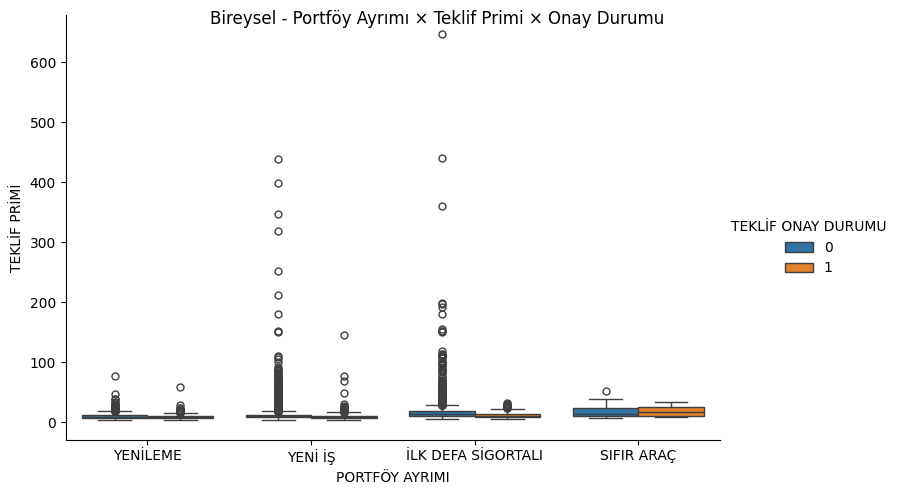

In [65]:
g = sns.catplot(x="PORTFÖY AYRIMI", y="TEKLİF PRİMİ", hue="TEKLİF ONAY DURUMU", 
                kind="box", data=df_bireysel, height=5, aspect=1.5)
g.fig.suptitle("Bireysel - Portföy Ayrımı × Teklif Primi × Onay Durumu")
plt.show()

- Yenileme müşterileri → en güvenilir ve en kolay onaylanan grup.
- Yeni müşteri kazanımı (Yeni İş, İlk Defa Sigortalı) → en zor gruplar, özellikle yüksek prim tekliflerinde hemen hiç onay yok.
- Sıfır Araç grubu → nispeten daha dengeli ama yine de prim arttıkça onay oranı düşüyor.

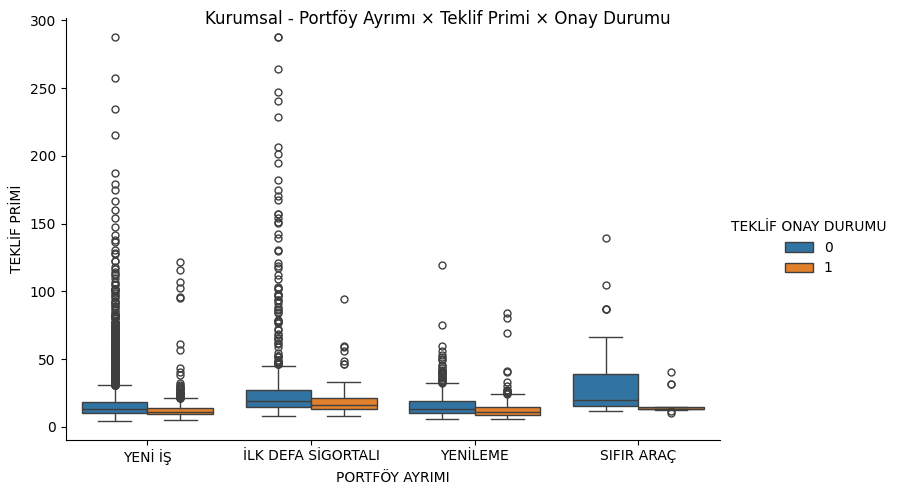

In [66]:
g = sns.catplot(x="PORTFÖY AYRIMI", y="TEKLİF PRİMİ", hue="TEKLİF ONAY DURUMU", 
                kind="box", data=df_kurumsal, height=5, aspect=1.5)
g.fig.suptitle("Kurumsal - Portföy Ayrımı × Teklif Primi × Onay Durumu")
plt.show()

- Yenileme kurumsallarda da en güvenilir grup, prim düzeyinden bağımsız olarak onaylanma olasılığı yüksek.
- Yeni müşteri kazanımı (Yeni İş, İlk Defa Sigortalı) → fiyat duyarlılığı çok yüksek, özellikle yüksek primlerde onay neredeyse yok.
- Sıfır Araç grubunda onaylanan teklifler var ama yüksek primlerde reddedilme oranı belirgin.

In [67]:
contingency = pd.crosstab(df_bireysel["İLÇE"], df_bireysel["TEKLİF ONAY DURUMU"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square:", chi2, "p-value:", p)


Chi-Square: 125.76982355979246 p-value: 0.013381369588683113


p < 0.05 → istatistiksel olarak anlamlı fark var.

Yani ilçe ile teklif onay durumu arasında bağımsızlık yok, yani ilçe değişkeni onay üzerinde etkili.

Başka bir deyişle, bazı ilçelerde müşterilerin teklifi onaylama olasılığı diğer ilçelere göre anlamlı derecede farklı.

### BİREYSEL SİGORTALILAR İÇİN YAPILACAK MODELLEMELER:
#### Lojistik regresyon, Random Forest, XGBoost